
# Проект. A/B-тест. Анализ гипотез



Располагаем спсиком гипотез для увеличения выручки.
Необходимо провести анализ и  выбрать основную для проведения A/B-теста 


**Часть 1. Приоритизация гипотез.**



9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


Задача
Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
Провести ииследования. Понять, изменилась приоритизация гипотез при применении RICE вместо ICE. 
Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста.**


Задача
Проанализируйте A/B-тест:
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. * Сделать выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и * * предположения.
* Принять решение по результатам теста и объяснить его.
* Принять решенией:
* 1. Остановить тест, зафиксировать победу одной из групп.
* 2. Остановить тест, зафиксировать отсутствие различий между группами.
* 3. Продолжить тест.



In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import warnings
import scipy.stats as stats
import numpy as np
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
visitors = pd.read_csv('/datasets/visitors.csv')
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')

In [3]:
#visitors = visitors.duplicated().sum()
#visitors


In [4]:
#hypothesis = hypothesis.duplicated().sum()
#hypothesis


In [5]:
#orders = orders.duplicated().sum()
#orders

Дубликатов в данных нет.


In [6]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [7]:
pd.set_option('display.max_colwidth', 150)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Нижний регистр. Расширенный вид.

In [8]:
hypothesis['ice'] = round(((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']), 2) 
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Убывание приоритета. Фреймворк ICE

In [9]:
hypothesis['rice'] = round(((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']), 2) 
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Убывание приоритета. Фреймворк RICE.


Фреймворк ICE для приоритезации гипотез вывел вариант "Запустить акцию, дающую скидку на товар в день рождения" на первое место.

Фреймворк RICE для приоритезации гипотез вывел вариант "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

Reach — охват пользователей по 10-балльной шкале - по данному критерию имеет смысл для дальнейшего исследования использовать гипотезу, которую вывел метод RICE. остановимся на ней. 

**Анализ A/B-теста**

In [10]:
display(visitors)
display(orders)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


**Построение графика кумулятивной выручки по группам**


In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Преобразование формата дат

In [12]:
datesGroups = orders[['date','group']].drop_duplicates() 


Созданы уникальные сочетания по дате и группе

In [13]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
    np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({
        'date': 'max', 
        'group': 'max', 
        'transactionId': 'nunique', 
        'visitorId': 'nunique',
        'revenue': 'sum',}
    ),axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.head() 

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Кумулятивные агренгированные значения по дням. Заказы.

In [14]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
    np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head() 

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Кумулятивные агренгированные значения по дням. Визиты посетитиелей.

In [15]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head() 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Сводим в обной таблице.

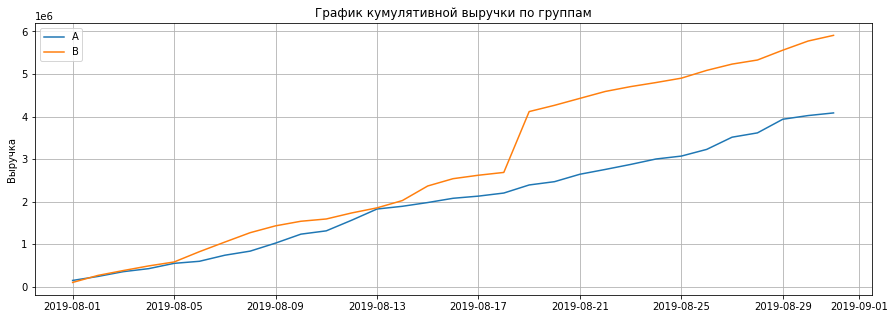

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5)) 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам'), plt.ylabel('Выручка')
plt.grid(), plt.legend()
plt.show()

График кумулятивной выручки по обеим группам.

Вторая половина августа - резкий рост по выручке, далее общий рост продолжался равномерно в обеих групп. Рост выручки может иметь разные причины. 

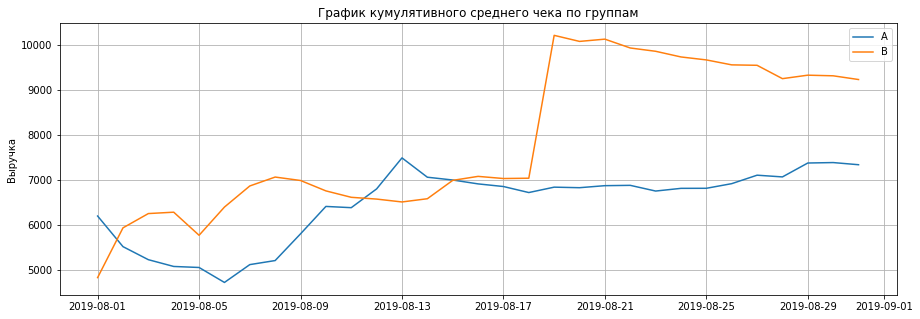

In [17]:
plt.figure(figsize=(15,5))
#group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
#group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам'), plt.ylabel('Выручка')
plt.grid(), plt.legend()
plt.show()

Средний чек в обеих группах. Значения среднего чека во второй половине августа  свидетельствовуют о крупном заказе. 

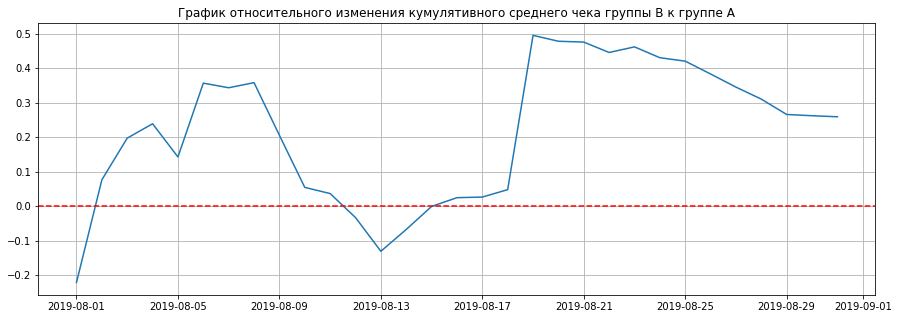

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'],(
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='red', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.show()

График визуализирующий относительность между значениями среднего чека В к А. Аналогичным образом значения В выше, чем А и резко в тех же таймингах 

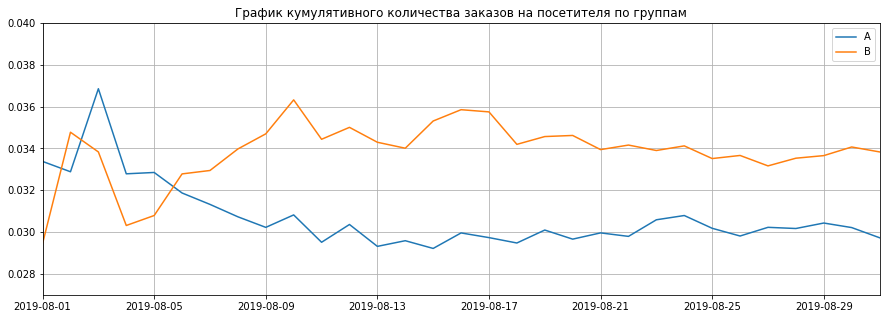

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного количества заказов на посетителя по группам')
plt.grid(), plt.legend()
plt.axis(['2019-08-01', '2019-08-31', 0.027, 0.04])
plt.show()

После 10 августа на графике кумулятивного количества заказов на посетителя заметна стабилизация значений относительно между группами.
Со 2 по 6 рост и падение. С 6 августа по  10 августа - ключевые изменения.

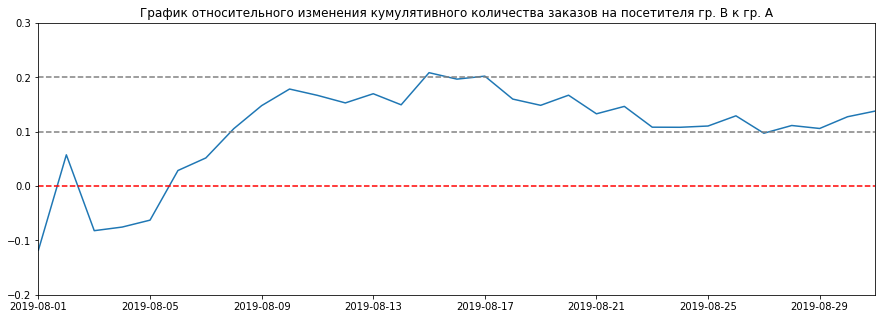

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('График относительного изменения кумулятивного количества заказов на посетителя гр. B к гр. A')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.2, 0.3]) 
plt.show()

На графике со значениями кумулятивных количеств у групп, относительно, группа В от А лидирует с отрывом , примерно, от 50 до 100%.
Лидерство с 10 августа. Неделю до этого - группа А "не уступала" лидерство.

In [21]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Срез по уникальным заказам для графика, для проверки и визуализации кол-ва заказов

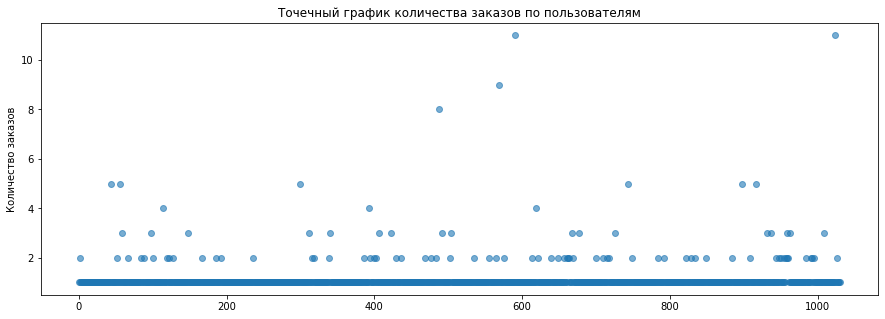

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.6) 

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

Точечный график показывает незначительное кол-во заказов в кол-ве 2шт. Еще меньше кол-во , где более 2 шт. 

In [23]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 96, 97, 98, 99]))

[1. 2. 2. 2. 3. 4.]


.Метод расчета перцентилей  с 90 по 99 свидетельствует о том, что максимум 3% - это заказы  в кол-ве 2шт. 1 процент- заказы более 4 шт. До 2 заказов, включительно, берем в работу - остальные отсекаем- статистически незначительно

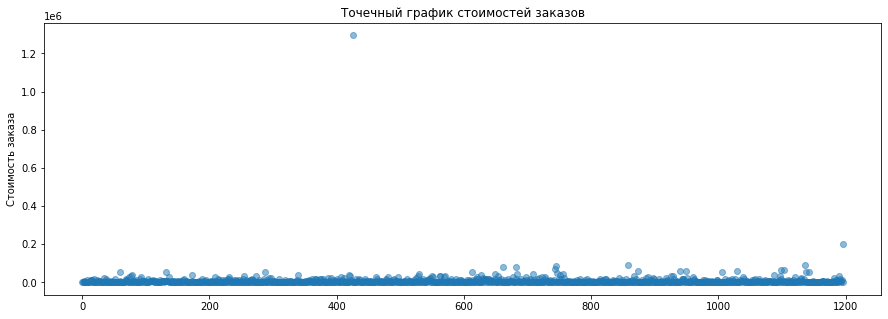

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'], alpha=0.5) 

plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show() 

Необходимо "отрезать" аномалии.

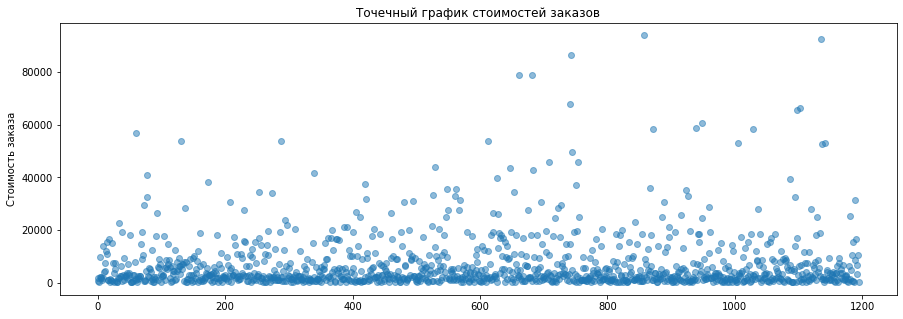

In [25]:
orders_low = orders.query('revenue < 150000')
x_values_low = pd.Series(range(0,len(orders_low['revenue'])))

plt.figure(figsize=(15,5))
plt.scatter(x_values_low, orders_low['revenue'], alpha=0.5) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show()  


In [26]:
print(np.percentile(orders['revenue'], [90, 95, 96, 97, 98, 99]))

[18168.  28000.  31382.  35485.  44133.2 58233.2]


Границу, по аналогии с предыдущим графиком, найдем методом определения 95 перцентили. 28 000 отсекаем.

In [27]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                     .agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
display(visitorsACummulative.head())


visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                     .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
display(visitorsBCummulative.head())

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Накопительный эффект в обеих группах по значению кол-вв пользователей и дате

In [28]:

ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
               .groupby('date', as_index=False)
               .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                 .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,).sort_values(by=['date'])
    
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']
display(ordersACummulative.head())


ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
               .groupby('date', as_index=False)
               .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                 .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
    
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
display(ordersBCummulative.head())

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Накопительный эффект в обеих группах по значению кол-вв заказов и дате

In [29]:
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Совмещаем в одну таблицу 

In [30]:

ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']
display(ordersByUsersA.head())

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']
display(ordersByUsersB.head())

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Пользовтели с одним и борлее заказов.
Задаем  уровень статистической значимости = 0.05. Метод Манна-Уитни определяет  p-value.
Н0 - различий в среднем количестве заказов нет, Н1 - различия среднем количестве заказов есть.


In [31]:

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,
index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)


sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,
index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Разные группы с кол-вом заказов. Без покупок - присвоено значение ноль

In [32]:
print('p-value:')
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
print('относительный прирост среднего группы B к конверсии группы А:')
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value:
0.017

относительный прирост среднего группы B к конверсии группы А:
0.138


По результатам вычислений отвергаем нулевую гипотезу. p-value < 0.05. Статистически значимые отличия. 
Около 14% прирост значений конверси B над A.

In [33]:
print('p-value:')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print()
print('относительное различие среднего чека между группами:')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:
0.729

относительное различие среднего чека между группами:
0.259


Тем же образом вычисляем разницу по среднему чеку. Пользовтели с одним и борлее заказов. Задаем уровень статистической значимости = 0.05. Метод Манна-Уитни определяет p-value. Н0 - различий в среднем чеке нет, Н1 - различия среднем чеке есть.

Нулевая гипотеза не отвергается. Превышение над p-value значительное. 0.729 > 0.05
Существенное относительное различие среднего чека говорит о наличии аномалий.

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

print('Всего аномальных пользователей: ', abnormalUsers.shape[0])

Всего аномальных пользователей:  74


In [35]:
print(np.percentile(ordersByUsersA['orders'], [90, 95, 96, 97, 98, 99]))
print(np.percentile(ordersByUsersB['orders'], [90, 95, 96, 97, 98, 99]))

[1.   2.   2.   2.   3.   3.98]
[1.   2.   2.   2.   2.   3.15]


In [36]:
print(np.percentile(orders['revenue'], [90, 95, 96, 97, 98, 99]))

[18168.  28000.  31382.  35485.  44133.2 58233.2]


По очищенным данным статистическая значимость различий в среднем кол-ве заказов на посетителя между группами

In [37]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders', ), ], axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], 
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders',),],axis=0,)

In [38]:
print('p-value:')
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
print('относительный прирост среднего группы B к конверсии группы А:')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value:
0.013

относительный прирост среднего группы B к конверсии группы А:
0.173


Статистическая значимость различий в среднем количестве заказов между группами теста по очищенным данным.
Схожесть с сырыми данными. Гипотезу HO отвергаем. 0.013 < 0.05
Группа В над А конверсия прирост около 17%



In [39]:
print('p-value:')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[
    np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))
print()
print('относительное различие среднего чека между группами:')
print("{0:.3f}".format(orders[
    np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() /
    orders[np.logical_and(orders['group'] == 'A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)),) ]['revenue'].mean() - 1))

p-value:
0.738

относительное различие среднего чека между группами:
-0.020


Статистическая значимость по среднему чеку чистые данные.
Статистическая значимость различий в среднем количестве заказов между группами теста по очищенным данным. Схожесть с сырыми данными.
Гипотеза не отвергается. По среднему чеку группа А выше, чем В. Аномалии тому вина. 

**Вывод**
Тест необходимо остановить. 
Группа В имеет выше конверсию по очищенным данным на 13.8% 

По среднему чеку различия минимальны, благодаря анализу и "чистке" аномалий в датасэтах. 
Графики успокаиваются с середины августа.
Продолжение теста, без каких-либо внешних событий вряд ли приведет к более длостоверным заключениям.